In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [5]:
#basic info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [9]:
print(df.columns)


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


In [10]:
#column name have extra space

df.columns = df.columns.str.strip()

In [11]:
df.columns # now everrything is file 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [12]:
# lets fill na values

df['Classes']=df['Classes'].fillna('fire')

In [13]:
df.isnull().sum() # no missing value ok 

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [14]:
df.info() # some columns are int and obj ok 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      122 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [15]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
5,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
6,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
7,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire
8,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire
9,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10,fire


In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      122 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [18]:
# in the data set have some issue lets find it out 

df['DC']=df['DC'].astype(str).str.strip()


In [19]:
df['FWI'].unique()# in the data set have str value which is fire

array(['0.2', '0.1', '1', '0.9', '3.1', '6', '0.8', '1.9', '10', '16.7',
       '12.9', '0.3', '0.6', '0.4', '4.9', '1.2', '5.3', '6.7', '9.5',
       '12', '18.4', '7.2', '2.2', '0.5', '6.4', '5.2', '9.9', '15',
       '6.3', '3', '1.3', '9.6', '4.7', 'fire   ', '14.1', '7.3', '7.7',
       '9.1', '13', '17.3', '30', '25.4', '16.3', '2.5', '0.7', '3.2',
       '9', '10.9', '13.2', '14.5', '13.5', '19.5', '20.9', '12.6', '5.9',
       '12.7', '10.7', '21.6', '18.8', '10.5', '15.7', '5.5', '14.8',
       '24', '26.3', '12.2', '18.1', '24.5', '26.9', '31.1', '30.3',
       '26.1', '6.1', '16', '19.4', '0', '2.7', '3.7', '3.9', '10.3',
       '5.7', '9.8', '19.3', '17.5', '15.4', '5.6', '3.8', '13.7', '15.2',
       '6.5'], dtype=object)

In [20]:
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce') # i convert the non numeric value into nan


In [21]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    object 
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
dtypes: float64(6), int64(6), object(2)
memory usage: 14.2+ KB


In [25]:
df['DC']=df['DC'].astype(float)

All GOOD

## save the cleaned data ok 


In [26]:
df.to_csv('Algerian_cleaned_data',index=False)

In [27]:
df_copy=df.drop(['day','month','year'],axis=1)

In [28]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...
117,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
118,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
119,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
120,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [29]:
# Lets convert the classes column into binary
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

#basically we convert class into numeric values like banary values in 0 and 1 

In [30]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [31]:
#lets check the type
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  121 non-null    int64  
 1   RH           121 non-null    int64  
 2   Ws           121 non-null    int64  
 3   Rain         121 non-null    float64
 4   FFMC         121 non-null    float64
 5   DMC          121 non-null    float64
 6   DC           121 non-null    float64
 7   ISI          121 non-null    float64
 8   BUI          121 non-null    float64
 9   FWI          121 non-null    float64
 10  Classes      121 non-null    int32  
dtypes: float64(7), int32(1), int64(3)
memory usage: 10.9 KB


In [32]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100

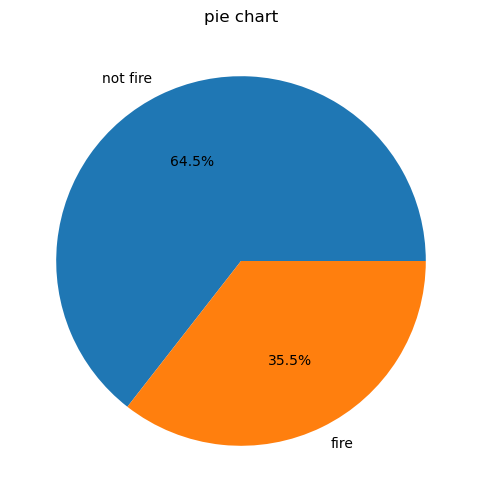

In [33]:
classlabels = ['not fire','fire']
plt.figure(figsize=(10,6))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('pie chart')
plt.show()

In [34]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.594127,-0.270491,-0.127553,0.571143,0.394472,0.292707,0.535954,0.373088,0.500971,0.498754
RH,-0.594127,1.000000,0.154297,0.146750,-0.644134,-0.384730,-0.275144,-0.691191,-0.367170,-0.605856,-0.440500
Ws,-0.270491,0.154297,1.000000,-0.137527,-0.025478,0.031887,0.023962,0.128558,0.033553,0.106128,0.046994
Rain,-0.127553,0.146750,-0.137527,1.000000,-0.509872,-0.349583,-0.347646,-0.412636,-0.359493,-0.410213,-0.474590
FFMC,0.571143,-0.644134,-0.025478,-0.509872,1.000000,0.584221,0.486333,0.752513,0.580449,0.719593,0.795500
DMC,0.394472,-0.384730,0.031887,-0.349583,0.584221,1.000000,0.882487,0.631017,0.987926,0.852193,0.537094
DC,0.292707,-0.275144,0.023962,-0.347646,0.486333,0.882487,1.000000,0.474039,0.927774,0.716965,0.464827
ISI,0.535954,-0.691191,0.128558,-0.412636,0.752513,0.631017,0.474039,1.000000,0.612286,0.916427,0.696190
BUI,0.373088,-0.367170,0.033553,-0.359493,0.580449,0.987926,0.927774,0.612286,1.000000,0.844715,0.548840
FWI,0.500971,-0.605856,0.106128,-0.410213,0.719593,0.852193,0.716965,0.916427,0.844715,1.000000,0.684079


<Axes: >

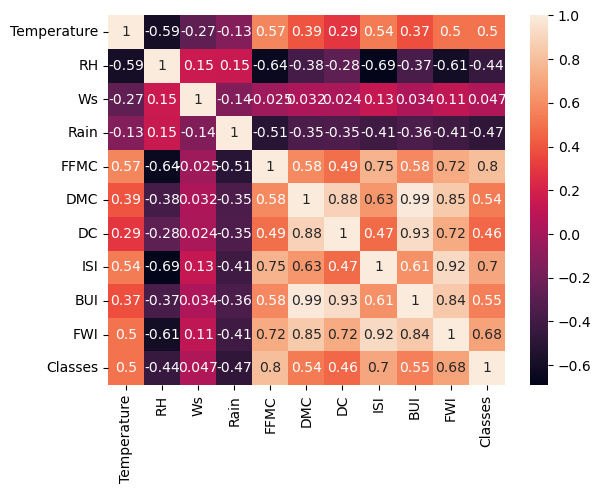

In [35]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

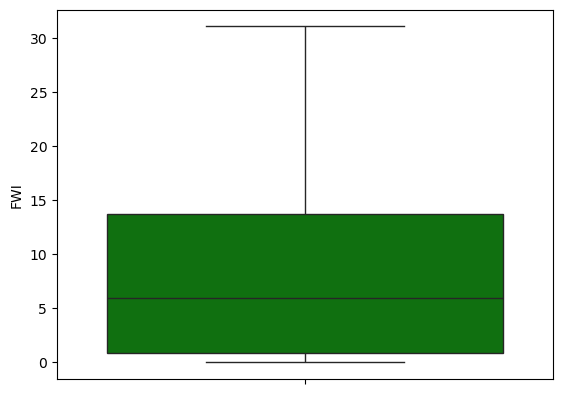

In [36]:
sns.boxplot(df_copy['FWI'],color='green')

In [43]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

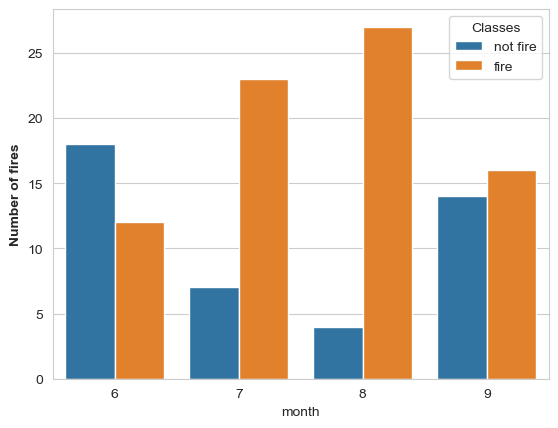

In [45]:
dftemp=df.loc[df['Classes']==0]
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires',weight='bold')
plt.x_label('Months',weight='bold')
plt.title('Number of fires by month',weight='bold')